# **Data Visualisations - Plotly**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [25]:
import os
current_dir = os.getcwd()
current_dir

'c:\\'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [22]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [23]:
current_dir = os.getcwd()
current_dir

'c:\\'

# Section 1

Section 1 Import numpy & pandas, matplotlib & seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_feat = pd.read_csv("../data/input/raw/Features-data-set.csv")
df_sale = pd.read_csv("../data/input/raw/sales-data-set.csv")
df_stor = pd.read_csv("../data/input/raw/stores-data-set.csv")


Consider only the first store, and drop columns related to holiday markdowns

In [29]:
df_feat.query('Store==1',inplace=True)
#df_feat = df_feat[['Date','Temperature','Fuel_Price','CPI','Unemployment']]
df_feat = df_feat[['Temperature','Fuel_Price','CPI','Unemployment']]
df_feat.head()

,Temperature,Fuel_Price,CPI,Unemployment
0,42.31,2.572,211.096358,8.106
1,38.51,2.548,211.242170,8.106
2,39.93,2.514,211.289143,8.106
3,46.63,2.561,211.319643,8.106
4,46.50,2.625,211.350143,8.106


We will calculate correlation levels using: pearson, which means we want to get the linear correlation among the variables

In [31]:
df_corr = df_feat.corr(method='pearson')
df_corr


,Temperature,Fuel_Price,CPI,Unemployment
Temperature,1.000000,0.186238,-0.125145,0.152326
Fuel_Price,0.186238,1.000000,0.676464,-0.439172
CPI,-0.125145,0.676464,1.000000,-0.880140
Unemployment,0.152326,-0.439172,-0.880140,1.000000


A heatmap with sns.heatmap() plots rectangular data as a colour-encoded matrix.
The arguments are:

data,
annot=True to display the number in each cell,
linewidth to create a grid of cells, making the plot more visual;
and cmap for setting the colour palette; 
annotation font size set with annot_kws={size}
upper part in correlation heatmap removed due to being repeated

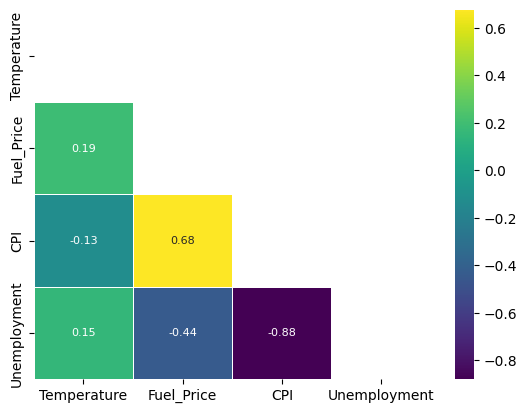

In [32]:

mask = np.zeros_like(df_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr,annot=True,mask=mask,cmap='viridis',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_corr.shape[1],0);
plt.show()

Plotly

In [11]:
df_stor.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [3]:
df_sale.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


Break down into years

In [2]:
df_sale['year'] = pd.to_datetime(df_sale['date']).dt.year

NameError: name 'pd' is not defined

In [3]:
# %pip install nbformat
fig = px.line(df_sale, x='Date', y='Year', title='Time Series with Rangeslider')
fig.update_xaxes(rangeslider_visible=True) ####### add range slider for time series data
fig.show()

NameError: name 'px' is not defined

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
